In [76]:
import pandas as pd
import seaborn as sns 
train_df = pd.read_csv("C:/Users/ajaym/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [80]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].agg(["count","mean"])

,FamilySize,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [81]:
train_df ['Fam_type'] = pd.cut(train_df.FamilySize, [0,1,4,7,11], labels=['Solo', 'Small', "Medium",'Big']) 
test_df ['Fam_type'] = pd.cut(test_df.FamilySize, [0,1,4,7,11], labels=['Solo', 'Small', "Medium",'Big']) 
# train_df['Fam_type'] = train_df['FamilySize'].replace({
#     1: 'One',
#     7: 'One',
#     2: 'Two',
#     3: 'Two',
#     4: 'Three',
#     5: 'Four',
#     6: 'Four',
#     8: 'Five',
#     11: 'Five'
# })


In [82]:
train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['count','mean'])

C:\Users\ajaym\AppData\Local\Temp\ipykernel_1808\105497654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['count','mean'])


,Fam_type,count,mean
0,Solo,537,0.303538
1,Small,292,0.578767
2,Medium,49,0.204082
3,Big,13,0.000000


C:\Users\ajaym\AppData\Local\Temp\ipykernel_1808\1270368438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\ajaym\AppData\Local\Temp\ipykernel_1808\1270368438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

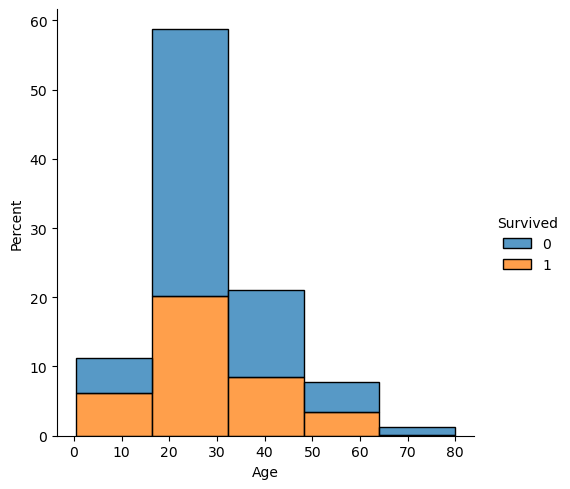

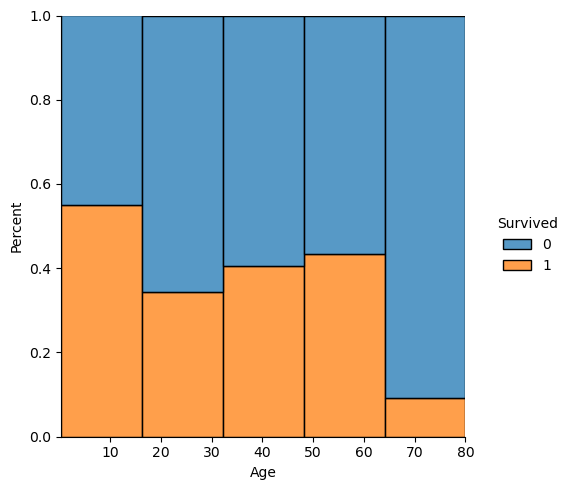

In [83]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
#sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
sns.displot(train_df, x='Age', hue='Survived', binwidth=17, height=5, multiple='stack', stat='percent')
sns.displot(train_df, x='Age', hue='Survived', binwidth=17, height=5, multiple='fill', stat='percent')

In [84]:
# train_df['Age_Cut'] = pd.qcut(train_df['Age'], 7)
# test_df['Age_Cut'] = pd.qcut(test_df['Age'], 7)
def encodeAge(train):
    train.loc[train_df['Age'] <= 17, 'Age'] = 0
    train.loc[(train_df['Age'] > 17) & (train_df['Age'] <= 32), 'Age'] = 1
    train.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
    train.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
    train.loc[ (train_df['Age'] > 64) & (train_df['Age'] <= 80), 'Age'] = 4
    
encodeAge(train_df)

def encodeAge(test):
    test.loc[test_df['Age'] <= 17, 'Age'] = 0
    test.loc[(test_df['Age'] > 17) & (test_df['Age'] <= 32), 'Age'] = 1
    test.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
    test.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
    test.loc[ (test_df['Age'] > 64) & (test_df['Age'] <= 80), 'Age'] = 4
    
encodeAge(test_df)

In [85]:
train_df.groupby(['Age'], as_index=False)['Survived'].mean()

,Age,Survived
0,0.0,0.539823
1,1.0,0.341176
2,2.0,0.404255
3,3.0,0.434783
4,4.0,0.090909


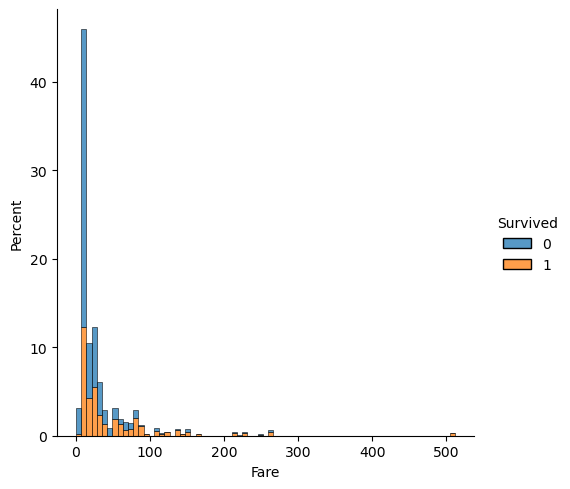

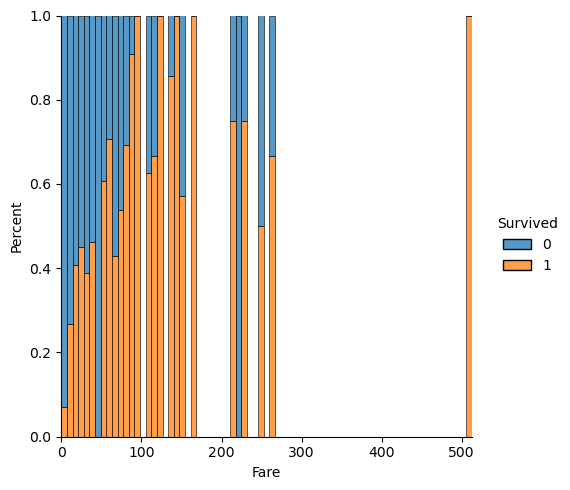

In [86]:
sns.displot(train_df, x='Fare', hue='Survived', binwidth=7, height=5 ,multiple='stack', stat='percent')
sns.displot(train_df, x='Fare', hue='Survived', binwidth=7, height=5, multiple='fill', stat='percent')

In [87]:
def encodeFare(train):
    train.loc[train_df['Fare'] <= 7, 'Fare'] = 0
    train.loc[(train_df['Fare'] > 7) & (train_df['Fare'] <= 14), 'Fare'] = 1
    train.loc[(train_df['Fare'] > 14) & (train_df['Fare'] <= 42.0), 'Fare'] = 2
    train.loc[(train_df['Fare'] > 42.0) & (train_df['Fare'] <= 512.329), 'Fare'] = 3

encodeFare(train_df)

def encodeFare(test):
    test.loc[test_df['Fare'] <= 7, 'Fare'] = 0
    test.loc[(test_df['Fare'] > 7) & (test_df['Fare'] <= 14), 'Fare'] = 1
    test.loc[(test_df['Fare'] > 14) & (test_df['Fare'] <= 42.0), 'Fare'] = 2
    test.loc[(test_df['Fare'] > 42.0) & (test_df['Fare'] <= 512.329), 'Fare'] = 3

encodeFare(test_df)

In [88]:
train_df.groupby(['Fare'], as_index=False)['Survived'].agg(["count","mean"])

,Fare,count,mean
0,0.0000,28,0.071429
1,1.0000,409,0.266504
2,2.0000,282,0.425532
3,3.0000,169,0.639053
4,512.3292,3,1.000000


In [89]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [90]:

train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [91]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


Here are the likely full forms or meanings of each title:

1. **Capt** - Captain
2. **Col** - Colonel
3. **Don** - Don (a title of respect, especially in Spanish-speaking countries)
4. **Dr** - Doctor
5. **Jonkheer** - Jonkheer (a Dutch honorific for minor nobility, similar to "Esquire")
6. **Lady** - Lady (a title for women of high social rank, often associated with nobility)
7. **Major** - Major (a military rank)
8. **Master** - Master (a title traditionally used for boys or young men)
9. **Miss** - Miss (a title for an unmarried woman)
10. **Mlle** - Mademoiselle (French for "Miss" or "young lady")
11. **Mme** - Madame (French for "Mrs." or "Madam")
12. **Mr** - Mister (a title for men)
13. **Mrs** - Mistress (commonly used as "Mrs." for married women)
14. **Ms** - Ms. (a title for women regardless of marital status)
15. **Rev** - Reverend (a title for a member of the clergy)
16. **Sir** - Sir (a title for men who have been knighted)
17. **the Countess** - Countess (a noble title for women, typically the wife of a Count)

In [92]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col','Major','Rev','Dr'], 'Officers')
train_df['Title'] = train_df['Title'].replace(['Mrs','Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Miss','Ms','Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Master'], 'Master')
train_df['Title'] = train_df['Title'].replace(['Lady','the Countess', 'Sir','Jonkheer','Don' ], 'VIP')
train_df['Title'] = train_df['Title'].replace(['Mr'], 'Mr')

test_df['Title'] = test_df['Title'].replace(['Capt', 'Col','Major','Rev','Dr'], 'Officers')
test_df['Title'] = test_df['Title'].replace(['Mrs','Mme'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Miss','Ms','Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Master'], 'Master')
test_df['Title'] = test_df['Title'].replace(['Lady','the Countess', 'Sir','Jonkheer','Don' ], 'VIP')
test_df['Title'] = test_df['Title'].replace(['Mr'], 'Mr')

In [93]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officers,18,0.277778
5,VIP,5,0.600000


In [94]:
def Ticket_nn(abc):
    if abc.isdigit():
        return abc
    else:
        return abc.split()[0]
train_df['Final_Ticket'] = train_df["Ticket"].apply(Ticket_nn)
test_df['Final_Ticket'] = test_df["Ticket"].apply(Ticket_nn)
train_df['Final_Ticket'] 

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: Final_Ticket, Length: 891, dtype: object

In [95]:
train_df.groupby(['Final_Ticket'], as_index=False)['Survived'].agg(["count","mean"])

,Final_Ticket,count,mean
0,110152,3,1.000000
1,110413,3,0.666667
2,110465,2,0.000000
3,110564,1,1.000000
4,110813,1,1.000000
...,...,...,...
552,SW/PP,1,1.000000
553,W./C.,9,0.111111
554,W.E.P.,1,0.000000
555,W/C,1,0.000000


In [96]:
NN = []
for i in train_df['Final_Ticket']:
    if i.isdigit():
        pass
    else:
        NN.append(i)

unique_values = list(set(NN))
print(unique_values)
print(len(unique_values))

['PP', 'S.P.', 'A/5', 'P/PP', 'S.C./A.4.', 'SW/PP', 'SO/C', 'F.C.', 'CA', 'A4.', 'S.W./PP', 'S.O./P.P.', 'LINE', 'STON/O', 'W.E.P.', 'PC', 'CA.', 'A/4.', 'SC', 'A/5.', 'F.C.C.', 'SC/PARIS', 'C', 'W./C.', 'S.O.P.', 'A.5.', 'Fa', 'A./5.', 'WE/P', 'A/S', 'SOTON/O2', 'A/4', 'C.A./SOTON', 'SCO/W', 'C.A.', 'SC/AH', 'SOTON/O.Q.', 'S.C./PARIS', 'SC/Paris', 'S.O.C.', 'SOTON/OQ', 'W/C', 'STON/O2.']
43


In [97]:
def dot_removal(abc):
    abc = abc.replace(".","")
    abc = abc.replace("/","")
    abc = abc.upper()
    return abc

PP =[]
for i in NN:
    PP.append(dot_removal(i))

after_unique_values = list(set(PP))
print(after_unique_values)
print(len(after_unique_values))

['PP', 'SP', 'A5', 'SOPP', 'FA', 'A4', 'CASOTON', 'CA', 'FC', 'LINE', 'PC', 'FCC', 'SWPP', 'SC', 'SOTONO2', 'SCPARIS', 'PPP', 'STONO', 'SCAH', 'SOTONOQ', 'SCOW', 'C', 'SOC', 'WEP', 'AS', 'SOP', 'STONO2', 'WC', 'SCA4']
29


In [98]:
train_df["Final_Ticket"] =  train_df["Final_Ticket"].apply(dot_removal)
test_df["Final_Ticket"] =  test_df["Final_Ticket"].apply(dot_removal)

In [99]:
train_df.Cabin = train_df.Cabin.fillna(train_df.Cabin.mode()[0])
test_df.Cabin = test_df.Cabin.fillna(test_df.Cabin.mode()[0])


In [100]:
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,734,0.328338
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000


In [101]:
train_df.Embarked=train_df.Embarked.fillna(train_df.Embarked.mode()[0])
test_df.Embarked=test_df.Embarked.fillna(test_df.Embarked.mode()[0])

In [102]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Fam_type', 'Title', 'Final_Ticket'],
      dtype='object')

In [103]:
train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','FamilySize'],inplace = True , axis = 1)
test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','FamilySize'],inplace = True , axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam_type,Title,Final_Ticket
0,0,3,male,1.0,1.0,B,S,Small,Mr,A5
1,1,1,female,2.0,3.0,C,C,Small,Mrs,PC
2,1,3,female,1.0,1.0,B,S,Solo,Miss,STONO2
3,1,1,female,2.0,3.0,C,S,Small,Mrs,113803
4,0,3,male,2.0,1.0,B,S,Solo,Mr,373450


In [104]:
from sklearn.preprocessing import LabelEncoder
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])
train_df["Cabin"] = LabelEncoder().fit_transform(train_df["Cabin"])
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])
train_df["Fam_type"] = LabelEncoder().fit_transform(train_df["Fam_type"])
#train_df["Age_Cut"] = LabelEncoder().fit_transform(train_df["Age_Cut"])
#train_df["Fare_cut"] = LabelEncoder().fit_transform(train_df["Fare_cut"])
train_df["Title"] = LabelEncoder().fit_transform(train_df["Title"])
train_df["Final_Ticket"] = LabelEncoder().fit_transform(train_df["Final_Ticket"])

test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])
test_df["Cabin"] = LabelEncoder().fit_transform(test_df["Cabin"])
test_df["Embarked"] = LabelEncoder().fit_transform(test_df["Embarked"])
test_df["Fam_type"] = LabelEncoder().fit_transform(test_df["Fam_type"])
# test_df["Age_Cut"] = LabelEncoder().fit_transform(test_df["Age_Cut"])
# test_df["Fare_cut"] = LabelEncoder().fit_transform(test_df["Fare_cut"])
test_df["Title"] = LabelEncoder().fit_transform(test_df["Title"])
test_df["Final_Ticket"] = LabelEncoder().fit_transform(test_df["Final_Ticket"])

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int32  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Cabin         891 non-null    int32  
 6   Embarked      891 non-null    int32  
 7   Fam_type      891 non-null    int32  
 8   Title         891 non-null    int32  
 9   Final_Ticket  891 non-null    int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 48.9 KB


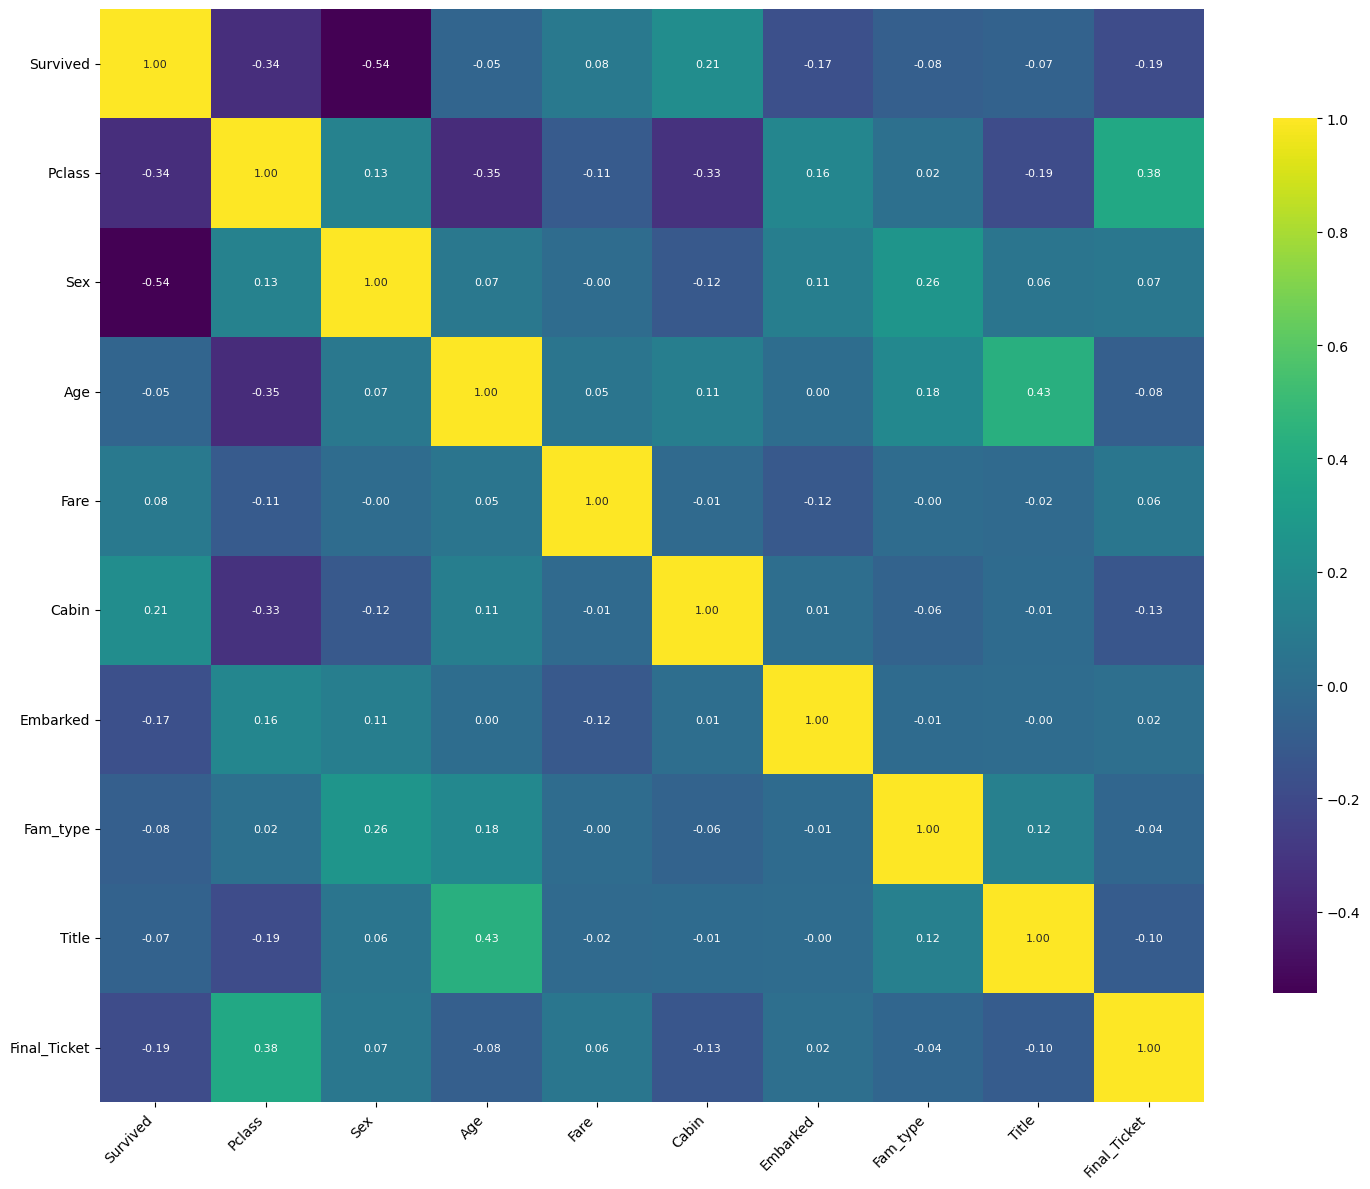

In [106]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Adjust the figure size and font properties for better readability
plt.figure(figsize=(15, 12))  # Increase figure size
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='viridis', 
                      fmt=".2f", 
                      annot_kws={"size": 8},  # Smaller font size for annotations
                      cbar_kws={"shrink": 0.8})  # Shrink color bar size

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [111]:
Final_df = train_df.loc[:,['Survived', 'Pclass', 'Sex', 'Embarked', 'Age','Fare','Fam_type', 'Title' ]]
test_df = test_df.loc[:,['Pclass', 'Sex', 'Embarked', 'Age','Fare','Fam_type', 'Title' ]]
Final_df

,Survived,Pclass,Sex,Embarked,Age,Fare,Fam_type,Title
0,0,3,1,2,1.0,1.0,2,2
1,1,1,0,0,2.0,3.0,2,3
2,1,3,0,2,1.0,1.0,3,1
3,1,1,0,2,2.0,3.0,2,3
4,0,3,1,2,2.0,1.0,3,2
...,...,...,...,...,...,...,...,...
886,0,2,1,2,1.0,1.0,3,4
887,1,1,0,2,1.0,2.0,3,1
888,0,3,0,2,1.0,2.0,2,1
889,1,1,1,0,1.0,2.0,3,2


In [112]:
X = Final_df.iloc[:,1:].values 
y = Final_df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0 )

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 10, n_estimators= 200)

rf_model = rfc.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

from sklearn.metrics import classification_report  #fare and removed
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Kaggle

In [114]:
y_pred = rf_model.predict(test_df)

test_data = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
a = test_data.iloc[:,0].values
dict = {'PassengerId': a, 'Survived': y_pred}

df1 = pd.DataFrame(dict)
# Save the DataFrame to a CSV file
df1.to_csv('output1.csv',index=False)

C:\Users\ajaym\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
'Survived', 'Pclass', 'Sex', 'Embarked', 'Age','Fare','Fam_type', 'Title' 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from itertools import combinations

# Define your feature columns
feature_columns = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Fam_type', 'Age_Cut','Fare_cut', 'Title', 'Final_Ticket']

# Initialize variables to keep track of the best score and corresponding features
best_accuracy = 0
best_features = None

# Loop through all combinations of feature columns
for i in range(1, len(feature_columns) + 1):
    for combo in combinations(feature_columns, i):
        # Create final DataFrame with the current combination of features
        df_clean = train_df.loc[:, ["Survived"] + list(combo)]
        
        # Define X and y
        X = df_clean.iloc[:, 1:].values 
        y = df_clean.iloc[:, 0].values
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        # Fit the model
        rfc = RandomForestClassifier()
        rf_model = rfc.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf_model.predict(X_test)
        
        # Calculate accuracy
        accuracy = (y_pred == y_test).mean()
        
        # Update best accuracy and features if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = combo

# Print the best accuracy and corresponding features
print("Best Accuracy:", best_accuracy)
print("Best Feature Combination:", best_features)


In [ ]:
import pickle
file = open('random_forest_titanic_model.pkl', 'wb')

pickle.dump(rf_model, file)

In [ ]:
import os
print(os.path.getsize('random_forest_titanic_model.pkl'))

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "random_forest_titanic_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf_model, file)

In [ ]:
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid (deep grid search)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],               # Number of trees
    'max_depth': [None, 10, 20, 30, 40],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                           # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],                # Number of features considered for best split
    'bootstrap': [True, False],                              # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy'],                        # Quality of split
}

# Initialize GridSearchCV with RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rfc_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc_model.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score

models = {'LogisticReg':LogisticRegression()
         ,'DecisionTree':DecisionTreeClassifier()
         ,'RandForest':RandomForestClassifier()
         ,'SVC':SVC()
         ,'GaussianNaiveBayes':GaussianNB()
         ,'KNN':KNeighborsClassifier()
         ,'GradientBoost':GradientBoostingClassifier()}

# Create an empty dictionary to store the results
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Loop through each model, train, predict, and collect the metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the test set
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by accuracy for better visibility
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame in a clear tabular format
metrics_df